# Deprived Area Mapping using Open Source Geospatial Data

Prepared by Maxwell Owusu
George Washington University
Fall, 2022

In [3]:
# import libraries

import sys
import numpy as np
import pandas as pd
from osgeo import gdal
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os

import utils
import util_preprocess

In [4]:
# import seaborn as sns


## Set working directory

In [5]:
# Get abosolute path of the current folder
FPATH = '/media/owusu/Extreme SSD/IDEAMAPS/Training_Dataset/Accra'

# Get abosolute output path of te current folder
OUTPUT = '/media/owusu/Extreme SSD/IDEAMAPS/Training_Dataset/Accra/'

target = 'class'

# Random seed
random_seed = 42
# Set random seed in numpy
np.random.seed(random_seed)

## Data Preprocessing
### Load covariate features

In [6]:
PATH= f'/media/owusu/Extreme SSD/IDEAMAPS/covariate_feature_53bands/acc_covariate_compilation_53bands.tif'
img = utils.read_image(PATH)
img_arr=img[0]
img_gt=img[1]
img_georef=img[2]

# Process spfea features, get the width, height and number of bands
n = img_arr.shape[0]
print ('number of bands',n) # number of bands
h = img_arr.shape[1]
print ('height', h) # height
w = img_arr.shape[2]
print ('width', w) # width

number of bands 53
height 562
width 842


### Convert covariate array to pandas dataframe

In [7]:
bandname = ['fs_dist_fs_2020', 'fs_dist_school_2020', 'in_dist_rd_2016', 'in_dist_rd_intersect_2016', 'in_dist_waterway_2016', 'in_night_light_2016',
'ph_base_water_2010', 'ph_bio_dvst_2015', 'ph_climate_risk_2020', 'ph_dist_aq_veg_2015', 'ph_dist_art_surface_2015', 'ph_dist_bare_2015',
'ph_dist_cultivated_2015', 'ph_dist_herb_2015', 'ph_dist_inland_water_2018', 'ph_dist_open_coast_2020', 'ph_dist_shrub_2015', 'ph_dist_sparse_veg_2015',
'ph_dist_woody_tree_2015', 'ph_gdmhz_2005', 'ph_grd_water_2000', 'ph_hzd_index_2011', 'ph_land_c1_2019', 'ph_land_c2_2020', 'ph_max_tem_2019',
'ph_ndvi_2019', 'ph_pm25_2016', 'ph_slope_2000', 'ses_an_visits_2016', 'ses_child_stunted_2016', 'ses_dpt3_2016', 'ses_hf_delivery_2016',
'ses_impr_water_src_2016', 'ses_ITN_2016', 'ses_m_lit_2016', 'ses_measles_2016', 'ses_odef_2016', 'ses_pfpr_2016', 'ses_preg_2016',
'ses_unmet_need_2016', 'ses_w_lit_2016', 'sh_dist_mnr_pofw_2019', 'sh_dist_pofw_2019', 'sh_ethno_den_2020', 'uu_bld_count_2020',
'uu_bld_den_2020', 'ho_impr_housing_2015', 'fs_dist_hf_2019', 'po_hrsl_2018', 'po_wp_2020', 'ph_dist_riv_network_2007', 'uu_urb_bldg_2018', 'ses_dist_gov_office_2022']


# Make dataframe
df_data=utils.make_data_frame(img_arr, bandname)
df_data.head()

(53, 562, 842)


,fs_dist_fs_2020,fs_dist_school_2020,in_dist_rd_2016,in_dist_rd_intersect_2016,in_dist_waterway_2016,in_night_light_2016,ph_base_water_2010,ph_bio_dvst_2015,ph_climate_risk_2020,ph_dist_aq_veg_2015,...,sh_ethno_den_2020,uu_bld_count_2020,uu_bld_den_2020,ho_impr_housing_2015,fs_dist_hf_2019,po_hrsl_2018,po_wp_2020,ph_dist_riv_network_2007,uu_urb_bldg_2018,ses_dist_gov_office_2022
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.344877
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.344203
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.343529
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.342857
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-3.402823e+38,-9999.0,-9999.0,255.0,-9999.0,0.342185


### Load training data

In [8]:
# PATH = f'{FPATH}/Tiles_merge.tif'
PATH = '/media/owusu/Extreme SSD/IDEAMAPS/Training_Dataset/Accra/New Folder/acc_150m_1000m_raster.tif'
train_set = utils.read_image(PATH)
train_array=train_set[0]
train_array = train_array.astype(int)
train_gt=train_set[1]
train_georef=train_set[2]
print (train_array.shape)

# Check unique values
(unique, counts) = np.unique(train_array, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

(562, 842)


array([[     0,   5085],
       [     1,   1739],
       [     3, 466380]])

### Convert array to pandas dataframe

In [9]:
train_col_name = ["class"]
tr_img_data = train_array.flatten()
df_train = pd.DataFrame(tr_img_data, columns=train_col_name)
df_train.head()
[df_train['class'].unique()]

[array([3, 1, 0])]

In [10]:
### Concatenate training and covariate features


In [11]:
# concat trainset and data
data_concat = pd.concat([df_train, df_data], axis=1)
print (data_concat.shape)

(473204, 54)


In [12]:
[data_concat['class'].unique()]

[array([3, 1, 0])]

In [13]:
df_full = data_concat.loc[data_concat['class'] != 3]
print(df_full.shape)
df_full.head()
[df_full['class'].unique()]

(6824, 54)


[array([1, 0])]

In [14]:
### Drop unwanted columns


In [15]:
# df_full = df_full.drop(columns=['ph_gdmhz_2005', 'ph_grd_water_2000', 'ph_hzd_index_2011', 'ph_base_water_2010', 'ses_pfpr_2016', 'ph_land_c1_2019', 'ph_land_c2_2020'])
df_full = df_full[['class', 'po_wp_2020', 'po_hrsl_2018', 'uu_bld_den_2020', 'uu_bld_count_2020', 'ph_slope_2000', 'ph_pm25_2016', 'ph_ndvi_2019', 'ph_bio_dvst_2015', 'ph_max_tem_2019', 'in_night_light_2016']]

### Split into train, validation and test


In [16]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and testing (20%)
df_train, df_test = train_test_split(df_full, train_size=0.99, random_state=random_seed)
# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.99, random_state=random_seed)
# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

print('df_train', df_train.shape)
print('df_val', df_val.shape)
print('df_test', df_test.shape)

df_train (6687, 11)
df_val (68, 11)
df_test (69, 11)


### Handling missing data

In [17]:
# Handling missing data
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Call nan_checker on df
df_nan = util_preprocess.nan_checker(df)

# Print df_nan
df_nan

# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,po_hrsl_2018,0.150791,float64
1,ph_slope_2000,0.101407,float64
2,po_wp_2020,0.061401,float64
3,uu_bld_den_2020,0.061254,float64
4,uu_bld_count_2020,0.061254,float64


In [18]:
# Imputing missing values
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Impute the variables with missing values in df_train, df_val and df_test
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

### Encoding data
 Checking for categorical features

In [19]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = util_preprocess.cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique


### Separating the training, validation and test data

In [20]:

# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [21]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [22]:
from sklearn.impute import SimpleImputer

# # The SimpleImputer
# si = SimpleImputer(missing_values=np.nan, strategy='mean')
# X_train = si.fit_transform(X_train)
# X_val = si.fit_transform(X_val)
# X_test = si.fit_transform(X_test)

# # The StandardScaler
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
#
# # Standardize the training data
# X_train = ss.fit_transform(X_train)
#
# # Standardize the validation data
# X_val = ss.transform(X_val)
#
# # Standardize the test data
# X_test = ss.transform(X_test)

### Preprocessing Test Data
Transfer learning

In [23]:
# Make dataframe

PATH= f'/media/owusu/Extreme SSD/IDEAMAPS/covariate_feature_53bands/nai_covariate_compilation_53bands.tif'
img = utils.read_image(PATH)
img_arr=img[0]
img_gt=img[1]
img_georef=img[2]

# Process spfea features, get the width, height and number of bands
n = img_arr.shape[0]
print (n) # number of bands
h = img_arr.shape[1]
print (h) # height
w = img_arr.shape[2]
print (w) # width

df_data=utils.make_data_frame(img_arr, bandname)
df_data.head()

53
740
655
(53, 740, 655)


,fs_dist_fs_2020,fs_dist_school_2020,in_dist_rd_2016,in_dist_rd_intersect_2016,in_dist_waterway_2016,in_night_light_2016,ph_base_water_2010,ph_bio_dvst_2015,ph_climate_risk_2020,ph_dist_aq_veg_2015,...,sh_ethno_den_2020,uu_bld_count_2020,uu_bld_den_2020,ho_impr_housing_2015,fs_dist_hf_2019,po_hrsl_2018,po_wp_2020,ph_dist_riv_network_2007,uu_urb_bldg_2018,ses_dist_gov_office_2022
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3.0,-9999.0
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3.0,-9999.0
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3.0,-9999.0
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3.0,-9999.0
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,3.0,-9999.0


In [24]:
# PATH = f'{FPATH}/Tiles_merge.tif'
PATH = '/media/owusu/Extreme SSD/IDEAMAPS/Training_Dataset/Nairobi/Nairobi_updated_tiles/nairobi_slums_SDI/Nairobi_tiles_raster.tif'
train_set = utils.read_image(PATH)
train_array=train_set[0]
train_array = train_array.astype(int)
train_gt=train_set[1]
train_georef=train_set[2]
print (train_array.shape)

# Check unique values
(unique, counts) = np.unique(train_array, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

train_col_name = ["class"]
tr_img_data = train_array.flatten()
df_train = pd.DataFrame(tr_img_data, columns=train_col_name)
df_train.head()
[df_train['class'].unique()]

# concat trainset and data
data_concat = pd.concat([df_train, df_data], axis=1)
print (data_concat.shape)

(740, 655)
[[     0   2657]
 [     1   1311]
 [     3 480732]]
(484700, 54)


In [25]:
df_full = data_concat.loc[data_concat['class'] != 3]
print(df_full.shape)
df_full.head()
[df_full['class'].unique()]

(3968, 54)


[array([0, 1])]

In [64]:
# X = df_full.drop(columns=['class','ph_gdmhz_2005', 'ph_grd_water_2000', 'ph_hzd_index_2011', 'ph_base_water_2010', 'ses_pfpr_2016', 'ph_land_c1_2019', 'ph_land_c2_2020'])
X = df_full[['po_wp_2020', 'po_hrsl_2018', 'uu_bld_den_2020', 'uu_bld_count_2020', 'ph_slope_2000', 'ph_pm25_2016', 'ph_ndvi_2019', 'ph_bio_dvst_2015', 'ph_max_tem_2019', 'in_night_light_2016']]
y = df_full['class'].values

In [27]:
X.columns

Index(['po_wp_2020', 'po_hrsl_2018', 'uu_bld_den_2020', 'uu_bld_count_2020',
       'ph_slope_2000', 'ph_pm25_2016', 'ph_ndvi_2019', 'ph_bio_dvst_2015',
       'ph_max_tem_2019', 'in_night_light_2016'],
      dtype='object')

In [28]:
#imputation
from sklearn.impute import SimpleImputer

# The SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
data_x_tran = si.fit_transform(X)


# # Standardize  data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_x_scale = ss.fit_transform(data_x_tran)

### Hyperparameter


In [29]:
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV

In [46]:
import catboost
from catboost import CatBoostClassifier, Pool

params = {'loss_function':'Logloss',
          'eval_metric':'F1',
          'early_stopping_rounds': 2000,
          'iterations': 4000,
          'verbose': 500,
          'random_seed': random_seed,
          'l2_leaf_reg': 9,
          'bootstrap_type': 'Bayesian',
          # 'learning_rate': 0.1,
          'bagging_temperature': 2.5
         }

model = CatBoostClassifier(**params, class_weights=[0.2, 0.8])
# model = CatBoostClassifier(**params, scale_pos_weight=1)

model.fit(X_train, y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_val, y_val), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True, # True for visualization of the training process (it is not shown in a published kernel - try executing this code)

         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8703794	test: 0.8888889	best: 0.8888889 (0)	total: 4.14ms	remaining: 16.6s
500:	learn: 0.9388837	test: 0.9195402	best: 0.9195402 (245)	total: 1.16s	remaining: 8.1s
1000:	learn: 0.9589415	test: 0.9356725	best: 0.9356725 (774)	total: 2.28s	remaining: 6.83s
1500:	learn: 0.9717205	test: 0.9356725	best: 0.9356725 (774)	total: 3.39s	remaining: 5.65s
2000:	learn: 0.9790028	test: 0.9356725	best: 0.9356725 (774)	total: 4.5s	remaining: 4.49s
2500:	learn: 0.9838675	test: 0.9356725	best: 0.9356725 (774)	total: 5.52s	remaining: 3.31s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 0.9356725146
bestIteration = 774

Shrink model to first 775 iterations.


In [31]:
from catboost.utils import eval_metric
# import CatBoost

predictions = model.predict(data_x_scale)

F1 = eval_metric(y, predictions, 'F1')
Precision = eval_metric(y, predictions, 'Precision')
Recall = eval_metric(y, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)

F1: [0.7054747054747055]
Recall: [0.7765064836003052]
Precision: [0.6463492063492063]


# Trying New Tuning

In [76]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=150,
    learning_rate=0.01,
    boosting_type='Plain',
    bootstrap_type='Bernoulli',
    subsample=0.5,
    one_hot_max_size=20,
    rsm=0.5,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    class_weights=[0.2, 0.8])

fast_model.fit(
    X_train, y_train,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [77]:


tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=2000,
    learning_rate=0.01,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    leaf_estimation_method='Newton',
    bootstrap_type='Bayesian'
)
tunned_model.fit(
    X_train, y_train,
    verbose=False,
    eval_set=(X_val, y_val),
    plot=True
)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [78]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),
)
best_model.fit(
    X_train, y_train,
    verbose=500
)


Learning rate set to 0.036271
0:	learn: 0.6568485	total: 4ms	remaining: 2.45s
500:	learn: 0.1263376	total: 1.25s	remaining: 281ms
613:	learn: 0.1111753	total: 1.53s	remaining: 0us


In [79]:
from catboost.utils import eval_metric
# import CatBoost

predictions = best_model.predict(data_x_scale)

F1 = eval_metric(y, predictions, 'F1')
Precision = eval_metric(y, predictions, 'Precision')
Recall = eval_metric(y, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)

F1: [0.5205855443732845]
Recall: [0.43401983218916856]
Precision: [0.6502857142857142]


In [80]:
best_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,2,23.522558
1,4,14.655864
2,0,14.409445
3,9,12.011919
4,8,9.201673
5,7,9.061419
6,3,8.110612
7,6,4.658452
8,5,3.168102
9,1,1.199957


In [97]:
pool_data = Pool(data= X_train,
                  label=y_train)
data = pd.DataFrame({'feature_importance': best_model.get_feature_importance(pool_data, type='ShapValues'),
              'feature_names': feature_names}).sort_values(by=['feature_importance'],
                                                       ascending=False)

ValueError: Per-column arrays must each be 1-dimensional

<AxesSubplot: ylabel='feature_names'>

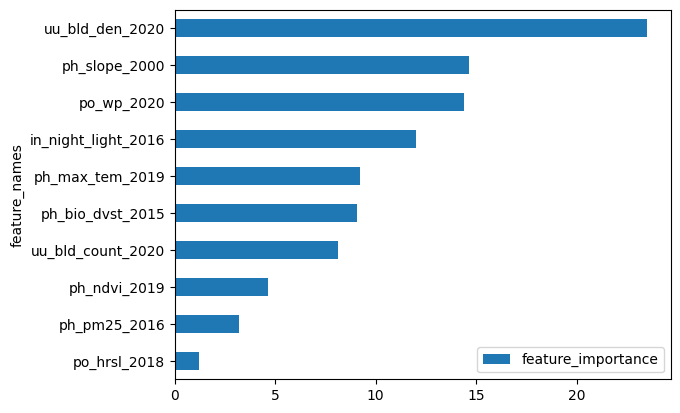

In [100]:
data[:20].sort_values(by=['feature_importance'], ascending=True).plot.barh(x='feature_names', y='feature_importance')

In [86]:
data

,feature_importance,feature_names
2,23.522558,uu_bld_den_2020
4,14.655864,ph_slope_2000
0,14.409445,po_wp_2020
9,12.011919,in_night_light_2016
8,9.201673,ph_max_tem_2019
7,9.061419,ph_bio_dvst_2015
3,8.110612,uu_bld_count_2020
6,4.658452,ph_ndvi_2019
5,3.168102,ph_pm25_2016
1,1.199957,po_hrsl_2018


In [87]:
shap_values = best_model.get_feature_importance(pool_data, type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)

(6687, 10)


In [98]:
data[:20].sort_values(by=['feature_importance'], ascending=True).plot.barh(x='feature_names', y='feature_importance')

array([[-0.29871813,  0.01511151, -0.448216  , ...,  0.11577221,
         1.24076357,  1.17344533],
       [-0.50450049,  0.02788372, -0.95558141, ..., -0.15157654,
         0.47630883,  0.47467921],
       [-0.14899311,  0.02056362,  0.48004013, ...,  1.3733906 ,
         1.86210187,  2.19908423],
       ...,
       [ 1.8246579 ,  0.18940271,  2.53846272, ...,  0.23691941,
         1.50051112,  1.71383845],
       [ 0.60861191, -1.08284403,  0.87192842, ..., -0.36305811,
        -0.65005783, -0.79356334],
       [-0.12880853,  0.01333778, -0.31398602, ..., -0.18706091,
         2.18324295,  2.34666761]])

In [88]:
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], X.iloc[3,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


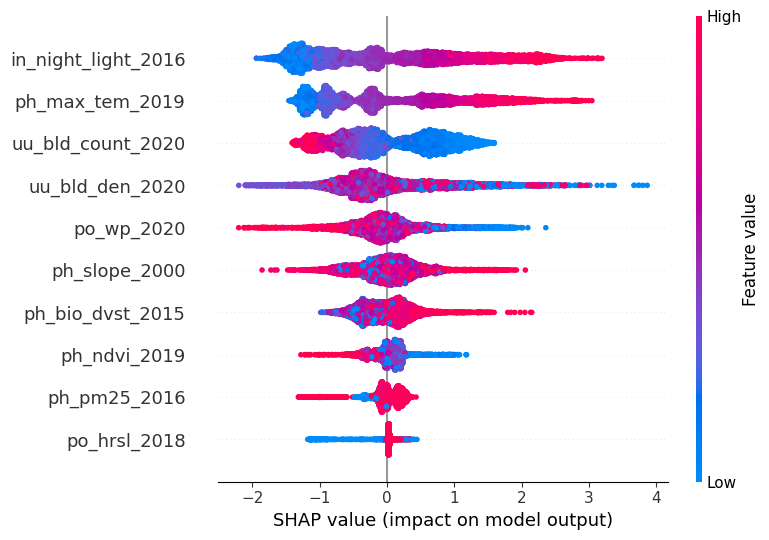

In [95]:
feature_names = ['po_wp_2020', 'po_hrsl_2018', 'uu_bld_den_2020', 'uu_bld_count_2020',
            'ph_slope_2000', 'ph_pm25_2016', 'ph_ndvi_2019', 'ph_bio_dvst_2015',
            'ph_max_tem_2019', 'in_night_light_2016']
df_shap = pd.DataFrame(X_train, columns=feature_names)
shap.summary_plot(shap_values, df_shap)



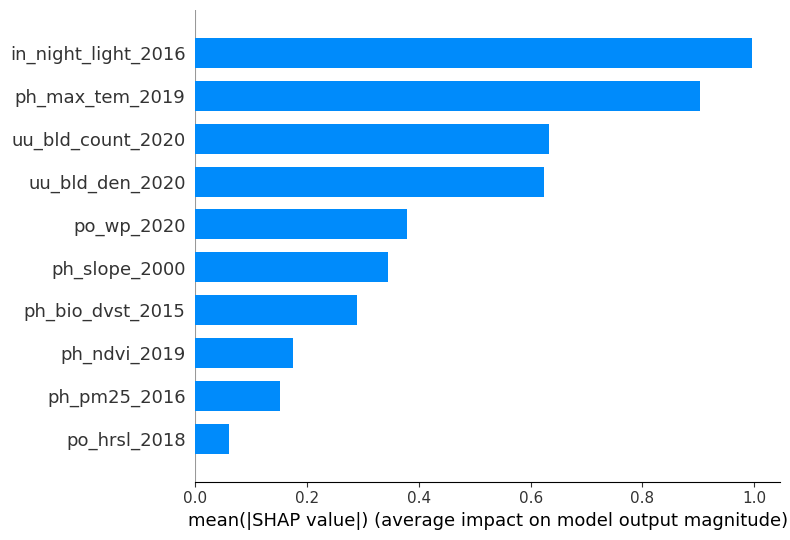

In [99]:
shap.summary_plot(shap_values, df_shap, plot_type='bar')

In [50]:
pool_data = Pool(data= data_x_scale,
                  label=y)

In [56]:
feature_names = ['po_wp_2020', 'po_hrsl_2018', 'uu_bld_den_2020', 'uu_bld_count_2020',
            'ph_slope_2000', 'ph_pm25_2016', 'ph_ndvi_2019', 'ph_bio_dvst_2015',
            'ph_max_tem_2019', 'in_night_light_2016']

data = pd.DataFrame({'feature_importance': model.get_feature_importance(pool_data),
              'feature_names': feature_names}).sort_values(by=['feature_importance'],
                                                       ascending=False)

In [52]:


shap_values = model.get_feature_importance(pool_data, type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)



(3968, 10)


In [53]:
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], X.iloc[3,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


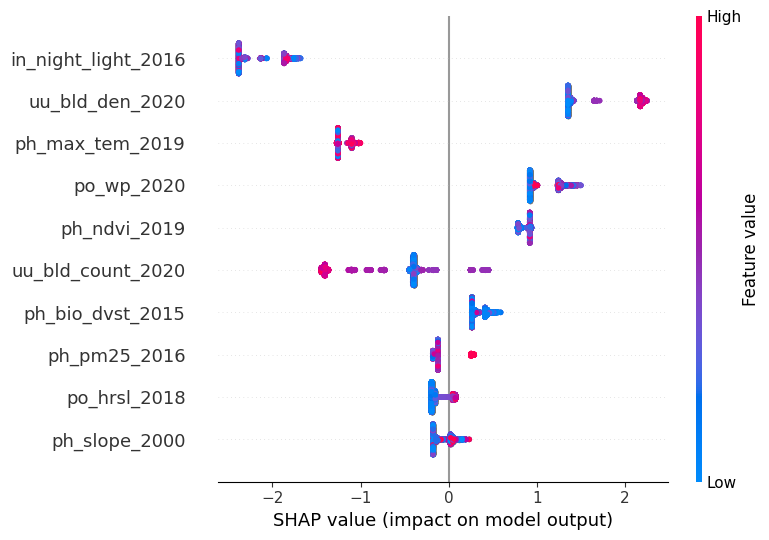

In [57]:
shap.summary_plot(shap_values, X)

<AxesSubplot: ylabel='feature_names'>

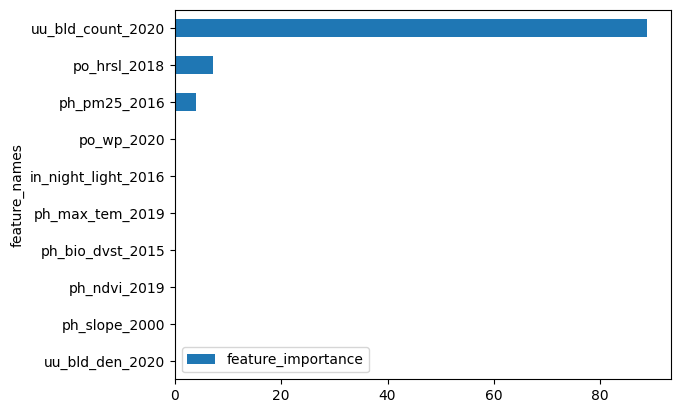

In [38]:
data[:20].sort_values(by=['feature_importance'], ascending=True).plot.barh(x='feature_names', y='feature_importance')

In [35]:
params = {
          'scale_pos_weight': 2.5,
          # 'random_seed': random_seed,
          #   'binary': 'logisic',
          'early_stopping_rounds': 100,
          'eval_metric':'error',
          'min_child_weight':7,
          'subsample': 0.8,
          'max_depth' : 5
         }

# print(grid_search.best_params_)
model = XGBClassifier(**params, validate_parameters=True, random_state=random_seed)
model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-error:0.13160	validation_1-error:0.11765
[1]	validation_0-error:0.12906	validation_1-error:0.11765
[2]	validation_0-error:0.11964	validation_1-error:0.13235
[3]	validation_0-error:0.11904	validation_1-error:0.11765
[4]	validation_0-error:0.11889	validation_1-error:0.11765
[5]	validation_0-error:0.11709	validation_1-error:0.11765
[6]	validation_0-error:0.11231	validation_1-error:0.11765
[7]	validation_0-error:0.11111	validation_1-error:0.13235
[8]	validation_0-error:0.10737	validation_1-error:0.14706
[9]	validation_0-error:0.10378	validation_1-error:0.14706
[10]	validation_0-error:0.10049	validation_1-error:0.14706
[11]	validation_0-error:0.10049	validation_1-error:0.14706
[12]	validation_0-error:0.09930	validation_1-error:0.14706
[13]	validation_0-error:0.09571	validation_1-error:0.14706
[14]	validation_0-error:0.09526	validation_1-error:0.14706
[15]	validation_0-error:0.09391	validation_1-error:0.14706
[16]	validation_0-error:0.09047	validation_1-error:0.13235
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=100, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [36]:
from catboost.utils import eval_metric
# import CatBoost

predictions = model.predict(data_x_scale)

F1 = eval_metric(y, predictions, 'F1')
Precision = eval_metric(y, predictions, 'Precision')
Recall = eval_metric(y, predictions, 'Recall')
print("F1:", F1)
print("Recall:", Recall)
print("Precision:", Precision)

F1: [0.4966849782155711]
Recall: [1.0]
Precision: [0.3303931451612903]


In [43]:
# yy = df_full[['class']]
# data = pd.DataFrame({'feature_importance': model.feature_importances_(X, yy),
#               'feature_names': feature_names}).sort_values(by=['feature_importance'],
#                                                        ascending=False)

TypeError: 'numpy.ndarray' object is not callable

In [102]:
# import seaborn as sns
# !pip install seaborn